# Latihan Soal Case 4

# Libraries

In [20]:
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Main Program

### Sequence

In [21]:
SeqA = ('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
SeqB = ('TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC')

### Determine score of best local alignment.

In [22]:
local_alignments = pairwise2.align.localxx(SeqB, SeqA)
for alignment in local_alignments:
    print(format_alignment(*alignment))

5 AAGCT-AGCTAGT-GCA-T-AGCTAGCTAGC
  ||||| ||||||  ||| | |||||||||||
1 AAGCTTAGCTAG-AGCAGTCAGCTAGCTAGC
  Score=26

5 AAGC-TAGCTAGT-GCA-T-AGCTAGCTAGC
  |||| |||||||  ||| | |||||||||||
1 AAGCTTAGCTAG-AGCAGTCAGCTAGCTAGC
  Score=26

5 AAGCT-AGCTAGTGCA-T-AGCTAGCTAGC
  ||||| ||||||.||| | |||||||||||
1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  Score=26

5 AAGC-TAGCTAGTGCA-T-AGCTAGCTAGC
  |||| |||||||.||| | |||||||||||
1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  Score=26



In [23]:
local_alignments = pairwise2.align.localxx(SeqB, SeqA, score_only = True)
print(local_alignments)

26.0


### Hamming Distance

In [24]:
def Hamming(SeqA, SeqB):
    Ham = []
    for i, j in zip(SeqA, SeqB):
        if (i != j):
            Ham.append((i, j))
    return len(Ham)
print(Hamming(SeqA, SeqB))

30


### Levenshtein

In [25]:
from Levenshtein import distance
print(distance(SeqA, SeqB))

9


### Plot

In [26]:
def compare(a, b):
    return True if a == b else False

In [27]:
def createMatrix(SeqA, SeqB):
    matrix = []
    for i in SeqA:
        row = []
        for j in SeqB:
            row.append(compare(i, j))
        matrix.append(row)
    return matrix

In [28]:
def renderMatrix(SeqA, SeqB):
    matrix = createMatrix(SeqA, SeqB)
    renderedMatrix = []
    print(' ' + SeqB)
    for i, j in zip(matrix, SeqA):
        row = ''
        row = row + j + '|'
        for l in i:
            if (l):
                row += '#'
            else:
                row += ' '
        print(row)

In [29]:
renderMatrix(SeqA, SeqB)

 TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC
A|    ##   #   #    # #   #   #  
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
C| #     #   #     #    #   #   #
T|# #     #   #  #   #   #   #   
T|# #     #   #  #   #   #   #   
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
C| #     #   #     #    #   #   #
T|# #     #   #  #   #   #   #   
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
C| #     #   #     #    #   #   #
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
T|# #     #   #  #   #   #   #   
C| #     #   #     #    #   #   #
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
C| #     #   #     #    #   #   #
T|# #     #   #  #   #   #   #   
A|    ##   #   #    # #   #   #  
G|   #  #   #   # #    #   #   # 
C| #     #   #     #    #   #   #
T|# #     #   #  #   #   #   #   
A|    ##   #   #    # #   #   #  
G|   #  #   #  

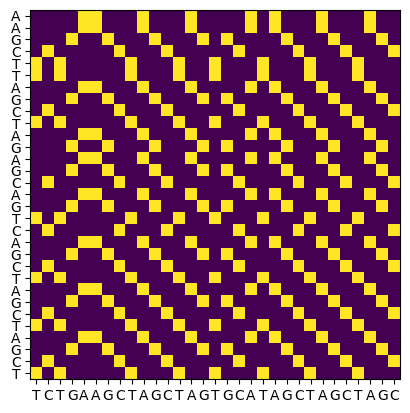

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(createMatrix(SeqA, SeqB)))
plt.yticks(np.arange(len(SeqA)), SeqA)
plt.xticks(np.arange(len(SeqB)), SeqB)
plt.show()